# Data Analysis with Pandas and Matplotlib

This notebook demonstrates how to load, explore, analyze data using pandas library and visualize it using matplotlib.

## Overview

1. Load and Explore the Iris Dataset
2. Basic Data Analysis
3. Data Visualization with Multiple Plot Types

## Task 1: Load and Explore the Dataset

First import the necessary libraries and load the Iris dataset from sklearn.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Set plotting style
plt.style.use('seaborn')
sns.set(font_scale=1.2)

# Display plots inline in notebook
%matplotlib inline

C:\Users\hp folio\AppData\Local\Temp\ipykernel_15432\2581128249.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column (flower species)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first 5 rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exploring the Structure of the Dataset

Let's check the data types and if there are any missing values.

In [3]:
# Display information about the DataFrame
print("Dataset Information:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
df.isnull().sum()

# Display the shape (rows and columns) of the dataset
print(f"\nDataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB

Missing values in each column:

Dataset dimensions: 150 rows and 5 columns


### Cleaning the Dataset

The Iris dataset is a clean dataset, but in real-world scenarios, we might need to handle missing values. Let's demonstrate how to do that:

In [4]:
# Create a copy of the DataFrame to demonstrate data cleaning
df_with_missing = df.copy()

# Artificially introduce some missing values for demonstration
# Set 5% of sepal length values to NaN
indices = np.random.choice(df.index, size=int(len(df) * 0.05), replace=False)
df_with_missing.loc[indices, 'sepal length (cm)'] = np.nan

# Display the dataset with missing values
print("Dataset with artificially introduced missing values:")
print(f"Missing values: {df_with_missing.isnull().sum()}")

# Clean the dataset by filling missing values with the mean
df_cleaned = df_with_missing.copy()
df_cleaned['sepal length (cm)'].fillna(df_cleaned['sepal length (cm)'].mean(), inplace=True)

# Verify that missing values are handled
print("\nAfter cleaning:")
print(f"Missing values: {df_cleaned.isnull().sum()}")

Dataset with artificially introduced missing values:
Missing values: sepal length (cm)    7
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

After cleaning:
Missing values: sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


## Task 2: Basic Data Analysis

Now, let's perform some basic analysis on our dataset.

In [5]:
# Compute basic statistics of numerical columns
print("Basic statistics of the dataset:")
df.describe()

Basic statistics of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Group by species and compute means of each feature
species_means = df.groupby('species').mean()
print("Mean values for each feature by species:")
species_means

Mean values for each feature by species:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [7]:
# Calculate additional statistics by species
species_stats = df.groupby('species').agg(['min', 'max', 'mean', 'std'])

# Display the statistics for sepal length only (for better readability)
print("Detailed statistics for sepal length by species:")
species_stats['sepal length (cm)']

Detailed statistics for sepal length by species:


,min,max,mean,std
species,,,,
setosa,4.3,5.8,5.006,0.352490
versicolor,4.9,7.0,5.936,0.516171
virginica,4.9,7.9,6.588,0.635880


### Interesting Findings

Looking at the data, we can observe:

1. **Setosa** species has the smallest sepal and petal dimensions among the three species.
2. **Virginica** generally has the largest dimensions.
3. **Petal length** and **petal width** show more variation between species compared to sepal measurements.
4. There's clear separation between species based on petal dimensions.

## Task 3: Data Visualization

Let's create various visualizations to better understand our data.

### 1. Line Chart - Trends Across Samples

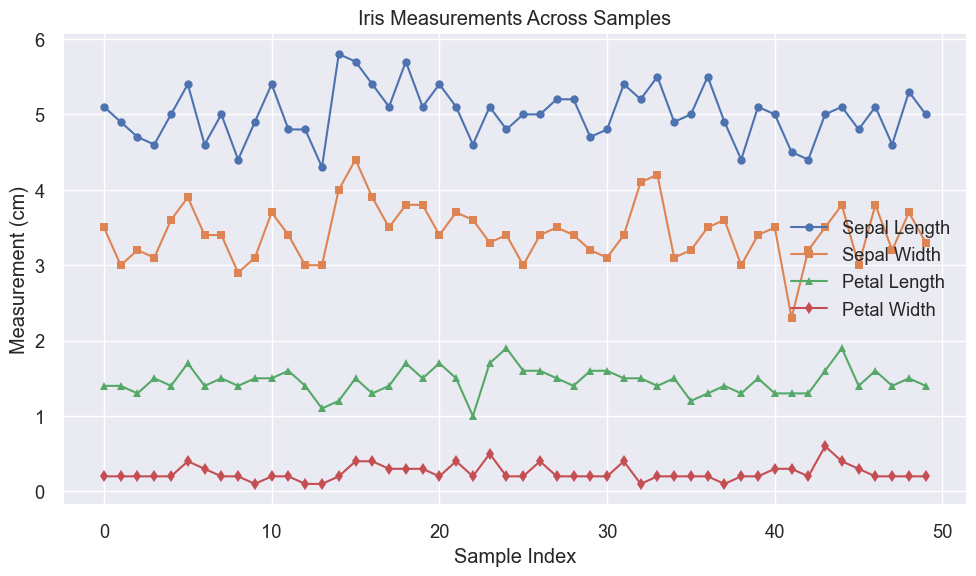

In [8]:
# Create a line chart showing trends across the first 50 samples
plt.figure(figsize=(10, 6))

# Select the first 50 samples and plot different features
sample_df = df.iloc[:50].reset_index()

plt.plot(sample_df.index, sample_df['sepal length (cm)'], marker='o', linestyle='-', label='Sepal Length')
plt.plot(sample_df.index, sample_df['sepal width (cm)'], marker='s', linestyle='-', label='Sepal Width')
plt.plot(sample_df.index, sample_df['petal length (cm)'], marker='^', linestyle='-', label='Petal Length')
plt.plot(sample_df.index, sample_df['petal width (cm)'], marker='d', linestyle='-', label='Petal Width')

plt.title('Iris Measurements Across Samples')
plt.xlabel('Sample Index')
plt.ylabel('Measurement (cm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 2. Bar Chart - Comparing Average Measurements by Species

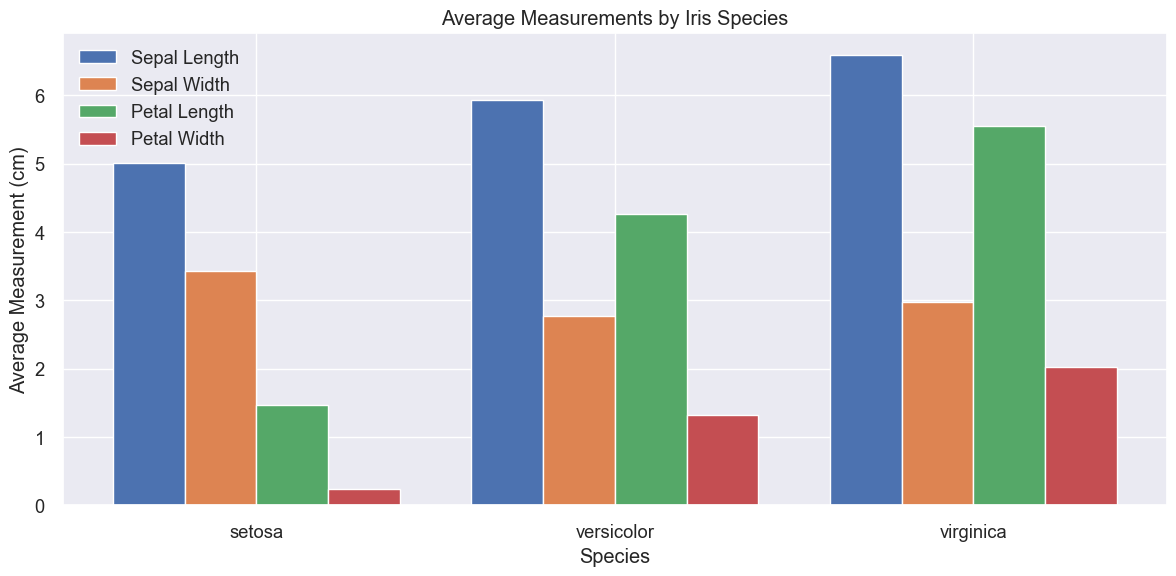

In [9]:
# Create a bar chart comparing average measurements by species
plt.figure(figsize=(12, 6))

# Set positions and width for bars
species_list = species_means.index
x = np.arange(len(species_list))
width = 0.2

# Create bars for each measurement
plt.bar(x - width*1.5, species_means['sepal length (cm)'], width, label='Sepal Length')
plt.bar(x - width/2, species_means['sepal width (cm)'], width, label='Sepal Width')
plt.bar(x + width/2, species_means['petal length (cm)'], width, label='Petal Length')
plt.bar(x + width*1.5, species_means['petal width (cm)'], width, label='Petal Width')

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Average Measurement (cm)')
plt.title('Average Measurements by Iris Species')
plt.xticks(x, species_list)
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### 3. Histograms - Distribution of Measurements

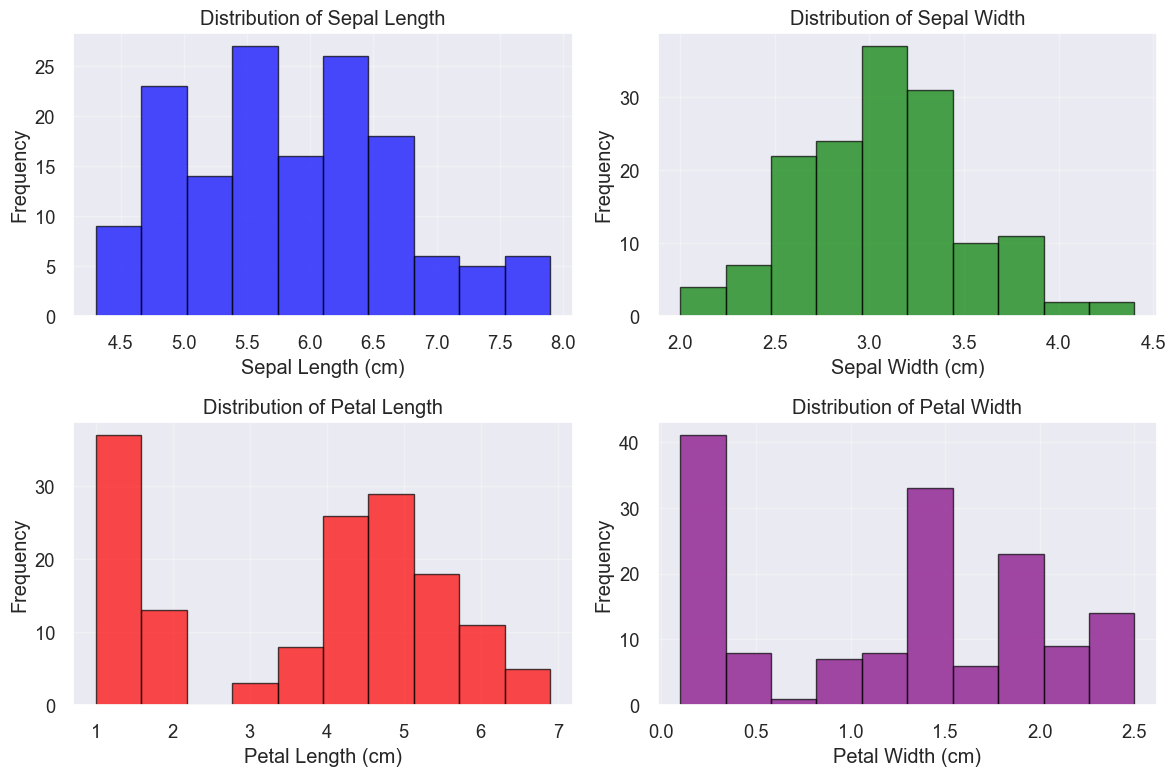

In [10]:
# Create histograms to visualize distributions
plt.figure(figsize=(12, 8))

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)
plt.hist(df['sepal length (cm)'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.hist(df['sepal width (cm)'], bins=10, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.hist(df['petal length (cm)'], bins=10, alpha=0.7, color='red', edgecolor='black')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.hist(df['petal width (cm)'], bins=10, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribution of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4. Scatter Plots - Relationships Between Features

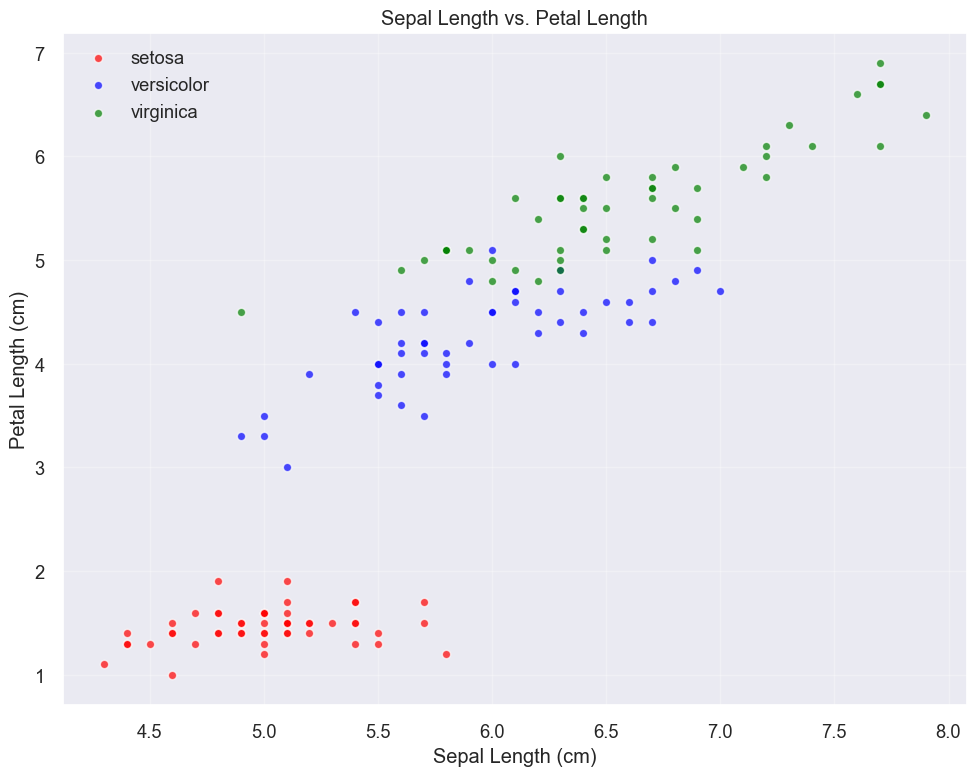

In [11]:
# Create scatter plots to visualize relationships between variables
plt.figure(figsize=(10, 8))

# Create a color map for the species
colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}

# Add points colored by species
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(
        subset['sepal length (cm)'],
        subset['petal length (cm)'],
        c=colors[species],
        label=species,
        alpha=0.7,
        edgecolors='w'
    )

plt.title('Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hp folio\AppData\Local\Temp\ipykernel_15432\2322825475.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp folio\AppData\Local\Temp\ipykernel_15432\2322825475.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


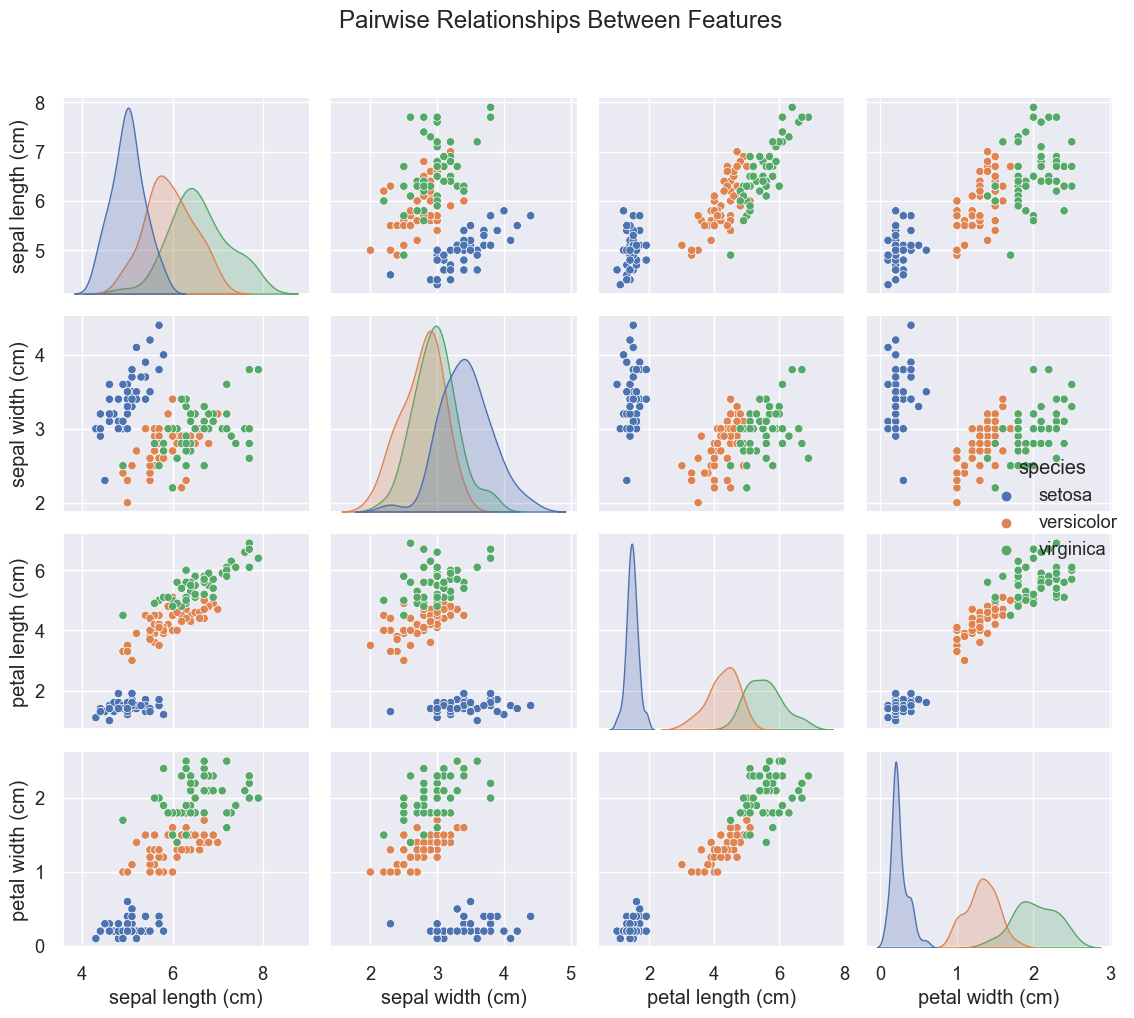

In [12]:
# Create a pairplot to visualize relationships between all features
sns.pairplot(df, hue='species', height=2.5)
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.tight_layout()
plt.show()

## Findings and Conclusions

Based on our analysis of the Iris dataset, we can draw the following conclusions:

1. **Species Differentiation**: The three species of Iris flowers (setosa, versicolor, and virginica) can be clearly differentiated based on their petal dimensions. Setosa has much smaller petals compared to the other species.

2. **Feature Correlations**: There is a strong positive correlation between petal length and petal width. Similarly, sepal length correlates positively with petal dimensions.

3. **Distribution Patterns**: The histograms reveal that petal dimensions have a bimodal distribution, which aligns with the clear separation between setosa and the other two species.

4. **Classification Potential**: Based on the scatter plots, it appears that these features would be effective for a classification model to distinguish between the three species, particularly for separating setosa from the others.

5. **Measurement Variations**: While setosa is clearly distinct, there is some overlap between versicolor and virginica in terms of their measurements, suggesting these two species might be harder to distinguish from each other using only these four features.